<a href="https://colab.research.google.com/github/foursue/sandbox/blob/main/%E6%8A%80%E8%82%B2CAMP_0622_%E3%83%8F%E3%83%B3%E3%82%BA%E3%82%AA%E3%83%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 手を動かして覚えるSQL〜CRUD操作編〜

技育CAMPアカデミア(２０２３年６月２２日)にて実施するハンズオンのColab用のノートブックです
Colabの実行環境さえあれば実行できるように作ってあります。
Googleドライブにsqliteのデータベースを保存するため、マウント実行時に権限の確認がでますので、動かすには許可をする必要があるので注意してください。

紹介ページ: https://talent.supporterz.jp/events/f4ee62d4-5005-44a0-8c69-fc98d860a851/

In [19]:
# ドライブのマウント

import sqlite3
# Googleドライブのマウント
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
colab_dir = "/content/drive/MyDrive/"
db_name = "test"
conn = sqlite3.connect(colab_dir + db_name + ".db")

Mounted at /content/drive


In [4]:
# テーブルを作ろう
# 構文の例
# CREATE TABLE [IF NOT EXISTS] [schema_name].table_name (
# 	column_1 data_type PRIMARY KEY,
#   column_2 data_type NOT NULL,
# 	column_3 data_type DEFAULT 0,
# 	table_constraints
# ) [WITHOUT ROWID];
# https://www.sqlite.org/lang_createtable.html

sql =  """\
CREATE TABLE IF NOT EXISTS testtable (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  name STRING,
  age INTEGER
)
"""

cur = conn.cursor()
cur.execute(sql)

In [20]:
# 検索しよう(最初はデータが登録されていないので、何も表示されない)
# SELECT 文
# https://www.sqlite.org/lang_select.html

sql =  """\
SELECT * FROM testtable
"""

cur = conn.cursor()
cur.execute(sql)

for row in cur:
  print(row)

OperationalError: ignored

In [8]:
# データを入れよう
# INSERT 文
# https://www.sqlite.org/lang_delete.html

sql =  """\
INSERT INTO testtable(
  name,
  age
) VALUES(
  "yamada",
  20
)
"""

cur = conn.cursor()
cur.execute(sql)
conn.commit()

In [10]:
# たくさんデータを入れよう
# 複数データのINSERT文
# https://docs.python.org/ja/3/library/sqlite3.html#sqlite3.Cursor.executemany

rows = [
    ("watanabe", 20),
    ("tanaka", 19),
    ("suzuki", 22),
]

sql = """\
INSERT INTO testtable(name, age) VALUES(?, ?)
"""

cur = conn.cursor()
cur.executemany(sql, rows)
conn.commit()

In [12]:
# データを変更しよう
# UPDATE 文
# https://www.sqlite.org/lang_update.html

sql = """\
UPDATE testtable SET
  age = 21
WHERE name = 'yamada'
"""

cur = conn.cursor()
cur.execute(sql)
conn.commit()

In [14]:
# データを消そう
# DELETE 文
# https://www.sqlite.org/lang_delete.html

sql =  """\
DELETE FROM testtable
"""

cur = conn.cursor()
cur.execute(sql)
conn.commit()

In [16]:
# 検索条件を指定しよう
# SELECT文 WHERE句
# https://www.sqlite.org/lang_select.html

sql =  """\
SELECT * FROM testtable
WHERE age = 20
"""

cur = conn.cursor()
cur.execute(sql)

for row in cur:
  print(row)


In [17]:
# テーブルを壊そう
# 構文の例
# DROP TABLE [IF EXISTS] [shcema_name].table_name
# https://www.sqlite.org/lang_droptable.html

sql = """\
DROP TABLE testtable
"""

cur = conn.cursor()
cur.execute(sql)

In [21]:
# コネクションを切ろう
# https://docs.python.org/ja/3/library/sqlite3.html#sqlite3.Connection.close

conn.close()

# Chinook DB でもう少し複雑なSQLをやろう

In [22]:
# データを持ってくる
# https://www.sqlitetutorial.net/sqlite-sample-database/
# https://github.com/lerocha/chinook-database
import urllib.request
url='https://github.com/lerocha/chinook-database/raw/master/ChinookDatabase/DataSources/Chinook_Sqlite.sqlite'
colab_dir = "/content/drive/MyDrive/"
save_name='Chinook_Sqlite.sqlite'

urllib.request.urlretrieve(url, colab_dir + save_name)

('/content/drive/MyDrive/Chinook_Sqlite.sqlite',
 <http.client.HTTPMessage at 0x7ff1f9d94190>)

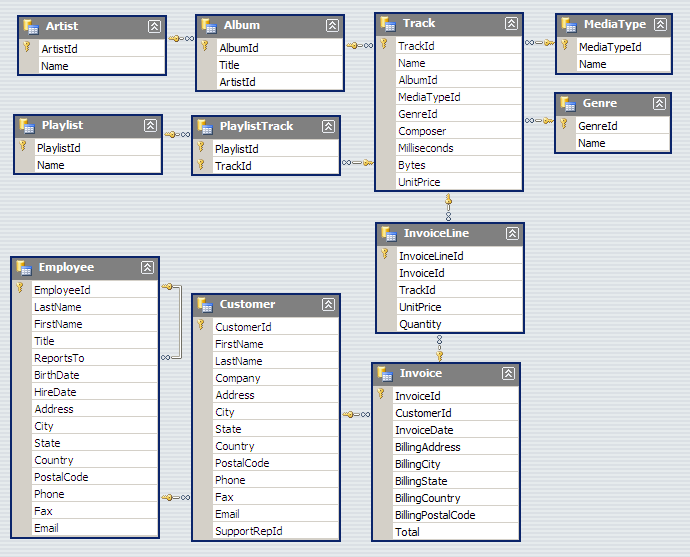
https://github.com/tharidlynn/chinook-etl

In [23]:
import sqlite3
# Googleドライブのマウント
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
colab_dir = "/content/drive/MyDrive/"
save_name='Chinook_Sqlite.sqlite'
conn = sqlite3.connect(colab_dir + save_name)

Mounted at /content/drive


In [24]:
# テーブル名の一覧
# テーブル名などに困ったら元になってるSQLを読もう
# https://github.com/lerocha/chinook-database/blob/master/ChinookDatabase/DataSources/Chinook_Sqlite.sql

sql =  """\
select name from sqlite_master
where type = 'table'
;
"""

cur = conn.cursor()
cur.execute(sql)

for row in cur:
  print(row)

('Album',)
('Artist',)
('Customer',)
('Employee',)
('Genre',)
('Invoice',)
('InvoiceLine',)
('MediaType',)
('Playlist',)
('PlaylistTrack',)
('Track',)


In [25]:
# 対象テーブルの列名の一覧
tablename = "Employee"

sql =  'SELECT * FROM %s limit 1' % (tablename)

cur = conn.cursor()
cur.execute(sql)
# print(cur.description)
for col in cur.description:
  print(col[0])

EmployeeId
LastName
FirstName
Title
ReportsTo
BirthDate
HireDate
Address
City
State
Country
PostalCode
Phone
Fax
Email


In [26]:
sql =  """\
select * from Employee
;
"""

cur = conn.cursor()
cur.execute(sql)

for row in cur:
  print(row)

(1, 'Adams', 'Andrew', 'General Manager', None, '1962-02-18 00:00:00', '2002-08-14 00:00:00', '11120 Jasper Ave NW', 'Edmonton', 'AB', 'Canada', 'T5K 2N1', '+1 (780) 428-9482', '+1 (780) 428-3457', 'andrew@chinookcorp.com')
(2, 'Edwards', 'Nancy', 'Sales Manager', 1, '1958-12-08 00:00:00', '2002-05-01 00:00:00', '825 8 Ave SW', 'Calgary', 'AB', 'Canada', 'T2P 2T3', '+1 (403) 262-3443', '+1 (403) 262-3322', 'nancy@chinookcorp.com')
(3, 'Peacock', 'Jane', 'Sales Support Agent', 2, '1973-08-29 00:00:00', '2002-04-01 00:00:00', '1111 6 Ave SW', 'Calgary', 'AB', 'Canada', 'T2P 5M5', '+1 (403) 262-3443', '+1 (403) 262-6712', 'jane@chinookcorp.com')
(4, 'Park', 'Margaret', 'Sales Support Agent', 2, '1947-09-19 00:00:00', '2003-05-03 00:00:00', '683 10 Street SW', 'Calgary', 'AB', 'Canada', 'T2P 5G3', '+1 (403) 263-4423', '+1 (403) 263-4289', 'margaret@chinookcorp.com')
(5, 'Johnson', 'Steve', 'Sales Support Agent', 2, '1965-03-03 00:00:00', '2003-10-17 00:00:00', '7727B 41 Ave', 'Calgary', 'A

In [27]:
# 登録されてる社員(Employee)の数を調べてみよう

sql =  """\
select count(*) from Employee
;
"""

cur = conn.cursor()
cur.execute(sql)

for row in cur:
  print(row)

(8,)


In [28]:
# 自己結合や直積を使って上司の名前を表示しよう
# Employee.ReportsTo に社員の上司の社員番号が書かれている
# 社員番号はEmployee.EmployeeId

# 自己結合の場合
sql =  """\
SELECT a.FirstName, a.LastName, "=>", b.FirstName, b.LastName
FROM Employee a
  INNER JOIN Employee b
    ON a.ReportsTo = b.EmployeeId
;
"""

# 直積の場合
sql =  """\
SELECT a.FirstName, a.LastName, "=>", b.FirstName, b.LastName
FROM Employee a, Employee b
WHERE a.ReportsTo = b.EmployeeId
;
"""

cur = conn.cursor()
cur.execute(sql)

for row in cur:
  print(row)

('Nancy', 'Edwards', '=>', 'Andrew', 'Adams')
('Jane', 'Peacock', '=>', 'Nancy', 'Edwards')
('Margaret', 'Park', '=>', 'Nancy', 'Edwards')
('Steve', 'Johnson', '=>', 'Nancy', 'Edwards')
('Michael', 'Mitchell', '=>', 'Andrew', 'Adams')
('Robert', 'King', '=>', 'Michael', 'Mitchell')
('Laura', 'Callahan', '=>', 'Michael', 'Mitchell')


In [30]:
# データの作り方いろいろ
# SELECTの結果をテーブルに保存したい

# CTAS(CREATE TABLE AS SELECT)パターン
# select count(*) from Employee の結果を tmp_sel_ins テーブルに保存
sql =  """\
CREATE TABLE IF NOT EXISTS tmp_sel_ins
AS
select count(*) from Employee
;
"""
cur = conn.cursor()
cur.execute(sql)
conn.commit()

sql =  """\
select * from tmp_sel_ins
;
"""
cur = conn.cursor()
cur.execute(sql)
for row in cur:
  print(row)


(8,)


In [32]:
# SELECT INSERTパターン
# もしまだテーブルがなければCREATE TABLEを事前にしてください
sql =  """\
INSERT INTO tmp_sel_ins
select count(*) from Employee
;
"""
cur = conn.cursor()
cur.execute(sql)
conn.commit()

sql =  """\
select * from tmp_sel_ins
;
"""
cur = conn.cursor()
cur.execute(sql)
for row in cur:
  print(row)


(8,)
(8,)
(8,)


In [33]:
# おまけのお題
# Invoice と InvoiceLine を使って、Invoiceごとの合計金額を10件だそう
sql =  """\
select Invoice.InvoiceId, sum(UnitPrice * Quantity) from Invoice
JOIN InvoiceLine
  ON Invoice.InvoiceId = InvoiceLine.InvoiceId
GROUP BY Invoice.InvoiceId
limit 10
;
"""
cur = conn.cursor()
cur.execute(sql)
for row in cur:
  print(row)


(1, 1.98)
(2, 3.96)
(3, 5.94)
(4, 8.91)
(5, 13.860000000000001)
(6, 0.99)
(7, 1.98)
(8, 1.98)
(9, 3.96)
(10, 5.94)


In [40]:
conn.close()

# Appendix

In [ ]:
# Reset AUTOINCREMENT
sql =  """\
DELETE FROM sqlite_sequence where name = 'testtable'
"""

cur = conn.cursor()
cur.execute(sql)
conn.commit()